# Projet : reconnaissance biométrique au clavier (novelty)
_Un projet d'Olivier Baurain, Romain Ceccoti, Jules Micho, Baptiste Millot et Hao Zhu_

_Avril 2019_

---

L'objectif de ce notebook est de proposer une première approche à la reconnaissance comportementale avec un Rubik's Cube, voir si l'on peut discerner un utilisateur légitime d'un imposteur à sa manière d'utiliser un Rubik's Cube.
Pour ce faire nous allons utiliser un alogrithme de novelty issue de la bibliothèque [scikit-learn](https://scikit-learn.org/stable/index.html).

![novelty_detection](https://scikit-learn.org/stable/_images/sphx_glr_plot_lof_novelty_detection_001.png)

<p style="text-align: center;"><b><i>Novelty Detection Example</i></b></p>

Voici les trois grandes étapes de ce notebook:

1. Récolte de données qui vont etre utilisé par notre algorithme
2. Exploitation des données
3. Interpretation de nos résultats


In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

#Set a seed
np.random.seed(1)

In [2]:
# Load dataset
ds = pd.read_csv('DatasetLURU.csv')

In [3]:
ds.iloc[0,:]

date      1553159921339
user           baptiste
device         Gi161124
0                     0
1                  1376
2                  1140
3                   660
4                   962
5                  1020
6                   840
7                  1259
Name: 0, dtype: object

In [4]:
# Création des data de test et de train pour Olivier
user = 'jules'
X = ds.loc[ds['user'] == user].drop(['date', 'user', 'device', '0'], axis=1)
y = ds.loc[ds['user'] == user].user

X_train, X_test, _, _ = train_test_split(X, y, test_size=0.30, shuffle=True)
X_outliers= ds.loc[ds['user'] != user].drop(['date', 'user', 'device', '0'], axis=1)


In [5]:
#Creation du model
clf = LocalOutlierFactor(contamination='auto', novelty=True, algorithm='auto')

#Fitting du model
clf.fit(X_train)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=True, p=2)

In [6]:
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

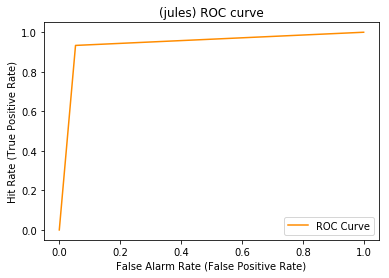

In [7]:
# Affiche de la courbe ROC
y_predictions = np.concatenate((y_pred_test, y_pred_outliers))
y_labels = [1]*len(y_pred_test) + [-1]*len(y_pred_outliers)


fpr, tpr, thresholds = roc_curve(y_labels, y_predictions, drop_intermediate=False)

plt.plot(fpr,tpr,color='darkorange', label='ROC Curve')
plt.xlabel('False Alarm Rate (False Positive Rate)')
plt.ylabel('Hit Rate (True Positive Rate)')
plt.title('('+user+')'+' ROC curve')
plt.legend()
plt.show()

In [8]:
print(user.upper())
print("Errors novel regular: %d/%d (%d%%)" % (n_error_test, len(y_pred_test), n_error_test*100/len(y_pred_test)))
print("Errors novel abnormal: %d/%d (%d%%)"% (n_error_outliers, len(y_pred_outliers), n_error_outliers*100/len(y_pred_outliers)))

JULES
Errors novel regular: 1/15 (6%)
Errors novel abnormal: 8/150 (5%)


### SAME CODE FOR OTHERS USERS

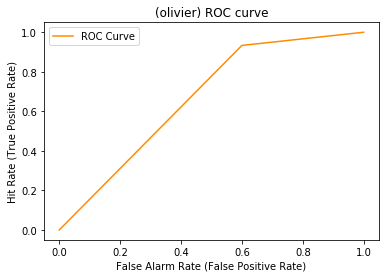

OLIVIER
Errors novel regular: 1/15 (6%)
Errors novel abnormal: 90/150 (60%)


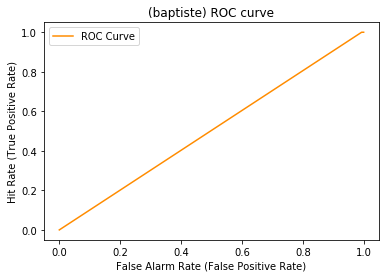

BAPTISTE
Errors novel regular: 0/15 (0%)
Errors novel abnormal: 149/150 (99%)


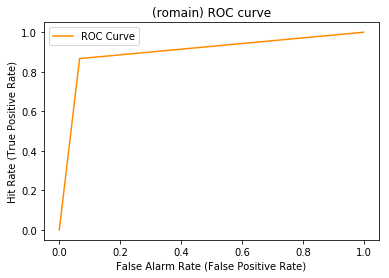

ROMAIN
Errors novel regular: 2/15 (13%)
Errors novel abnormal: 10/150 (6%)


In [9]:
# SAME CODE AS ABOVE FOR OTHER USERS

users = ['olivier', 'baptiste', 'romain']
for user in users:
    ds = pd.read_csv('DatasetLURU.csv')
    X = ds.loc[ds['user'] == user].drop(['date', 'user', 'device', '0'], axis=1)
    y = ds.loc[ds['user'] == user].user
    X_train, X_test, _, _ = train_test_split(X, y, test_size=0.30, shuffle=True)
    X_outliers= ds.loc[ds['user'] != user].drop(['date', 'user', 'device', '0'], axis=1)
    clf = LocalOutlierFactor(contamination='auto', novelty=True, algorithm='auto')
    clf.fit(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
    y_predictions = np.concatenate((y_pred_test, y_pred_outliers))
    y_labels = [1]*len(y_pred_test) + [-1]*len(y_pred_outliers)
    fpr, tpr, thresholds = roc_curve(y_labels, y_predictions, drop_intermediate=False)
    plt.plot(fpr,tpr,color='darkorange', label='ROC Curve')
    plt.xlabel('False Alarm Rate (False Positive Rate)')
    plt.ylabel('Hit Rate (True Positive Rate)')
    plt.title('('+user+')'+' ROC curve')
    plt.legend()
    plt.show()
    print(user.upper())
    print("Errors novel regular: %d/%d (%d%%)" % (n_error_test, len(y_pred_test), n_error_test*100/len(y_pred_test)))
    print("Errors novel abnormal: %d/%d (%d%%)"% (n_error_outliers, len(y_pred_outliers), n_error_outliers*100/len(y_pred_outliers)))